In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from decimal import Decimal

In [2]:
toScientificNotation = lambda x : '%.1E' % Decimal(x)

# Gráfico geral - Todos algoritmos

In [3]:
ds2 = pd.read_csv("../files/analyze/analisys_all_algorithms_average.csv").head(7)
ds2.rename(columns={'Unnamed: 0': 'Algoritmo'}, inplace=True)

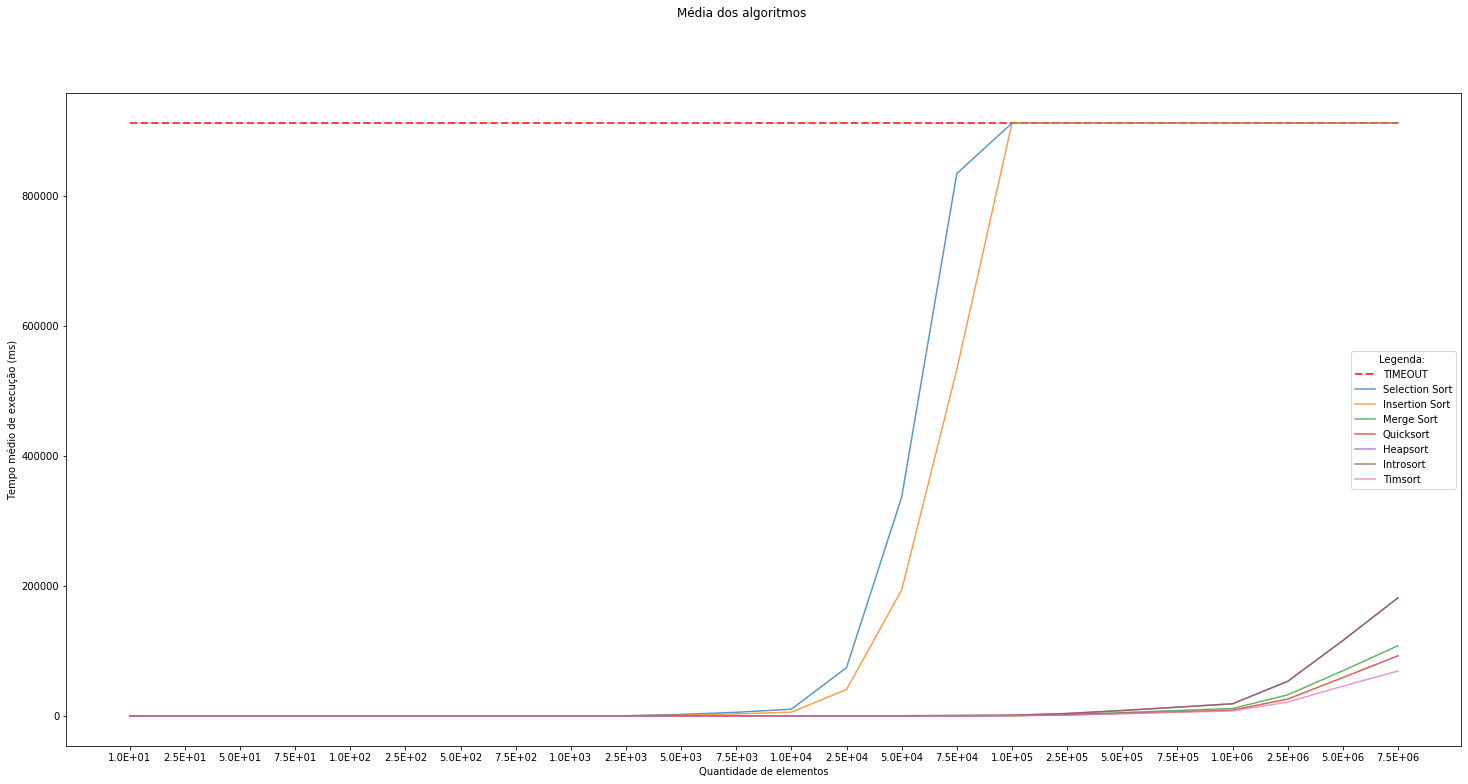

In [4]:
columns = np.array(list(map(toScientificNotation, ds2.columns[1:])))
plt.figure(figsize=(25,12))
plt.plot(columns, [912242] * 24, '--', color="r", label="TIMEOUT", alpha=0.75, linewidth=2)
plt.plot(columns, ds2.values[0][1:], label="Selection Sort", alpha=0.75)
plt.plot(columns, ds2.values[1][1:], label="Insertion Sort", alpha=0.75)
plt.plot(columns, ds2.values[2][1:], label="Merge Sort", alpha=0.75)
plt.plot(columns, ds2.values[3][1:], label="Quicksort", alpha=0.75)
plt.plot(columns, ds2.values[4][1:], label="Heapsort", alpha=0.75)
plt.plot(columns, ds2.values[5][1:], label="Introsort", alpha=0.75)
plt.plot(columns, ds2.values[6][1:], label="Timsort", alpha=0.75)
plt.legend(title="Legenda: ")
plt.ylabel("Tempo médio de execução (ms)")
plt.xlabel("Quantidade de elementos")
plt.suptitle("Média dos algoritmos")
plt.savefig("analisys_all_algorithms_average.svg", format="svg")
plt.show()

# Algoritmos mais rápidos

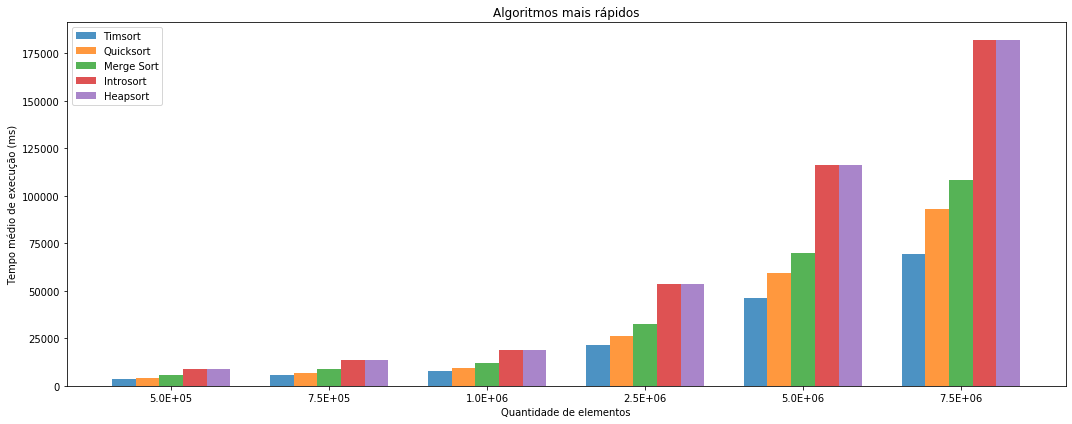

In [5]:
# data to plot
n_groups = 6
means_timsort = ds2.values[6][-6:]
means_introsort = ds2.values[5][-6:]
means_heapsort = ds2.values[4][-6:]
means_quicksort = ds2.values[3][-6:]
means_mergesort = ds2.values[2][-6:]

# create plot
plt.figure(figsize=(15,6))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects2 = plt.bar(index, means_timsort, bar_width,
alpha=opacity,
label='Timsort')

rects1 = plt.bar(index + bar_width, means_quicksort, bar_width,
alpha=opacity,
label='Quicksort')

rects5 = plt.bar(index + (2 * bar_width), means_mergesort, bar_width,
alpha=opacity,
label='Merge Sort')

rects4 = plt.bar(index + (3 * bar_width), means_introsort, bar_width,
alpha=opacity,
label='Introsort')

rects3 = plt.bar(index + (4 * bar_width), means_heapsort, bar_width,
alpha=opacity,
label='Heapsort')

plt.xlabel('Quantidade de elementos')
plt.ylabel('Tempo médio de execução (ms)')
plt.title('Algoritmos mais rápidos')
plt.xticks(index + 2*bar_width, columns[-6:])
plt.legend()
plt.tight_layout()
plt.savefig("faster_algorithms.svg", format="svg")
plt.show()

# Algoritmos mais lentos

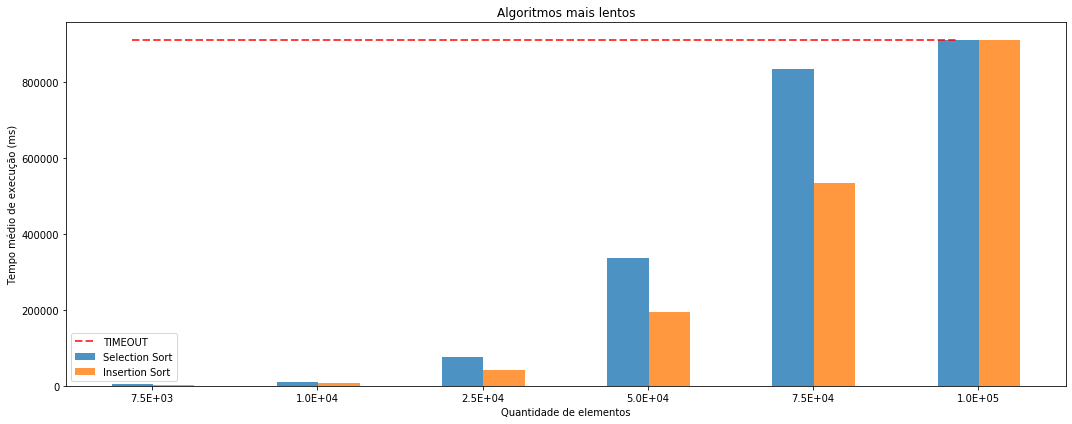

In [11]:
# data to plot
n_groups = 6
means_selectionsort = ds2.values[0][-13:-7]
means_insertionsort = ds2.values[1][-13:-7]

# create plot
plt.figure(figsize=(15,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

plt.plot(columns[-13:-7], [912242] * 6, '--', color="r", label="TIMEOUT", alpha=0.75, linewidth=2)

rects2 = plt.bar(index, means_selectionsort, bar_width,
alpha=opacity,
label='Selection Sort')

rects1 = plt.bar(index + bar_width, means_insertionsort, bar_width,
alpha=opacity,
label='Insertion Sort')

plt.xlabel('Quantidade de elementos')
plt.ylabel('Tempo médio de execução (ms)')
plt.title('Algoritmos mais lentos')
plt.xticks(index + 0.48 * bar_width, columns[-13:-7])
plt.legend()
plt.tight_layout()
plt.savefig("slower_algorithms.svg", format="svg")
plt.show()

# Gráficos de cada algoritmo

In [7]:
nums = [ "10", "25", "50", "75", "100", "250", "500", "750", "1000", "2500", "5000", "7500", "10000", "25000", "50000", "75000", "100000", "250000", "500000", "750000", "1000000", "2500000", "5000000", "7500000" ]
algorithms = ["heapsort", "insertsort", "introsort", "mergesort", "quicksort", "selectsort", "timsort"]

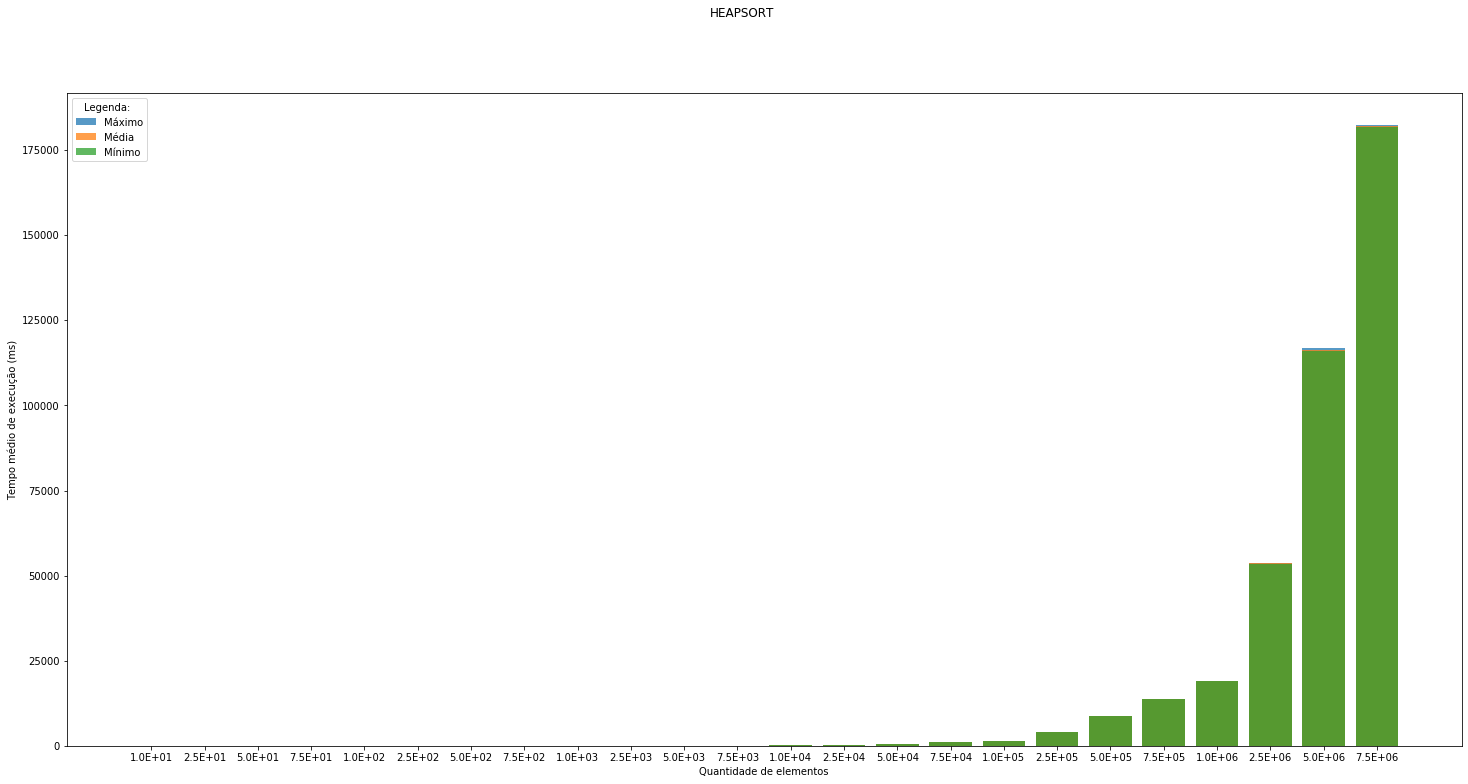

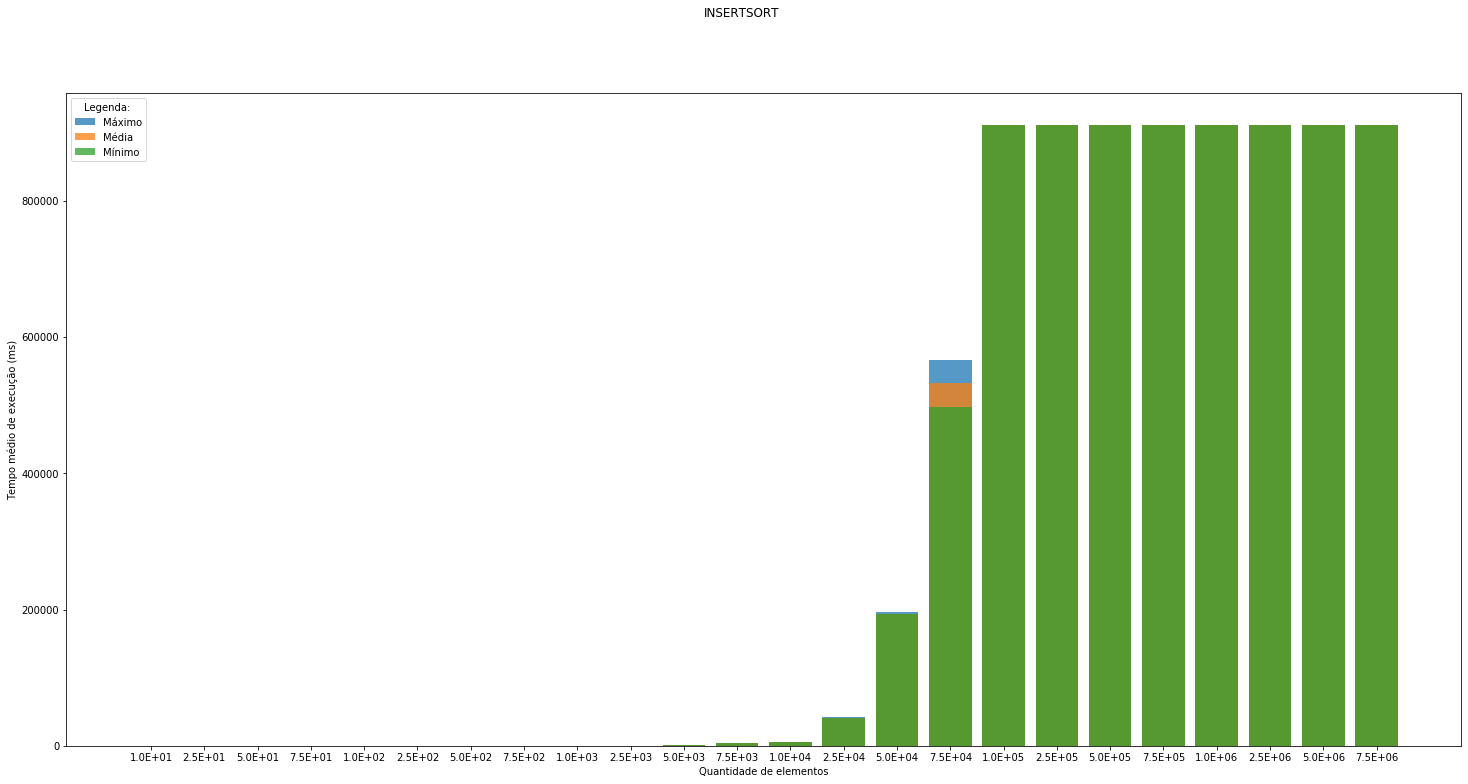

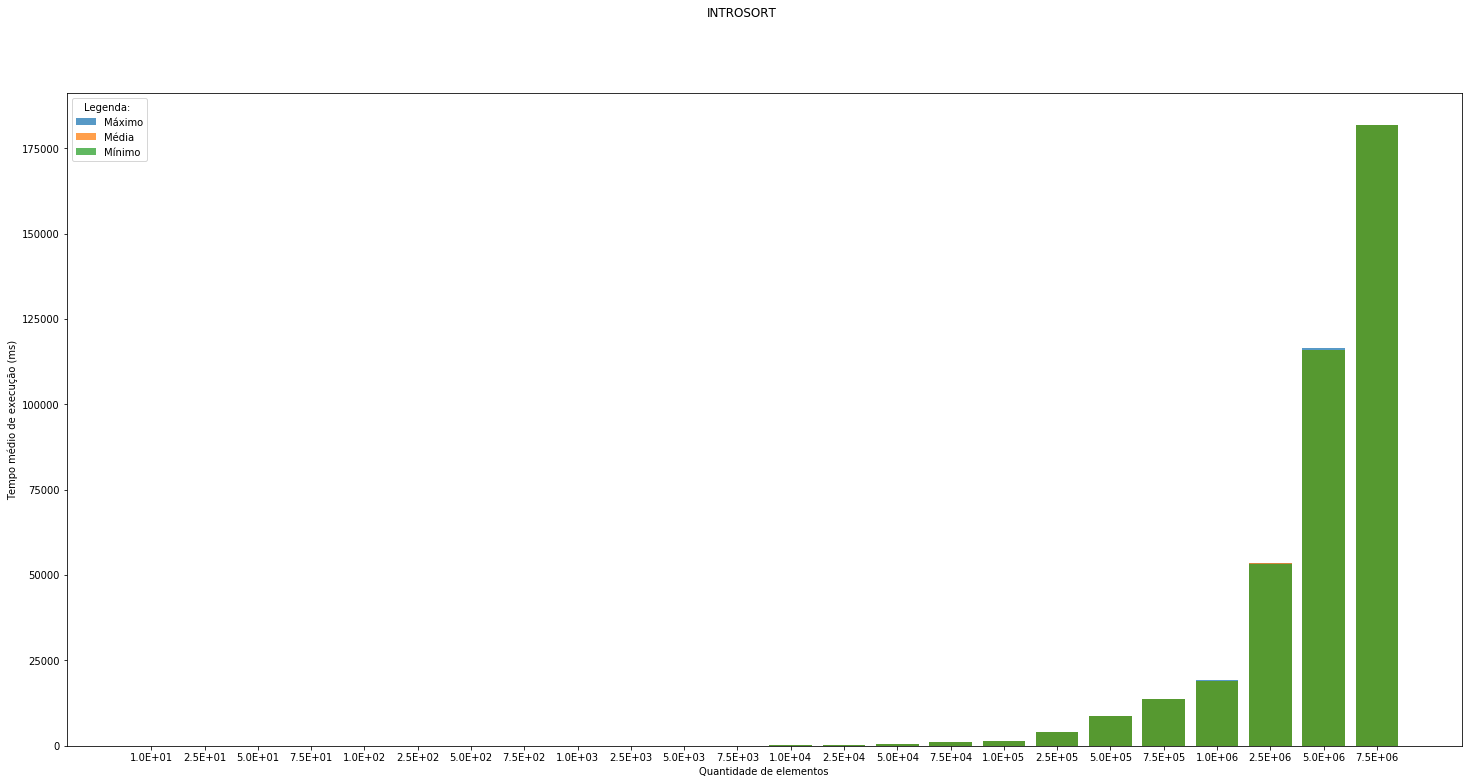

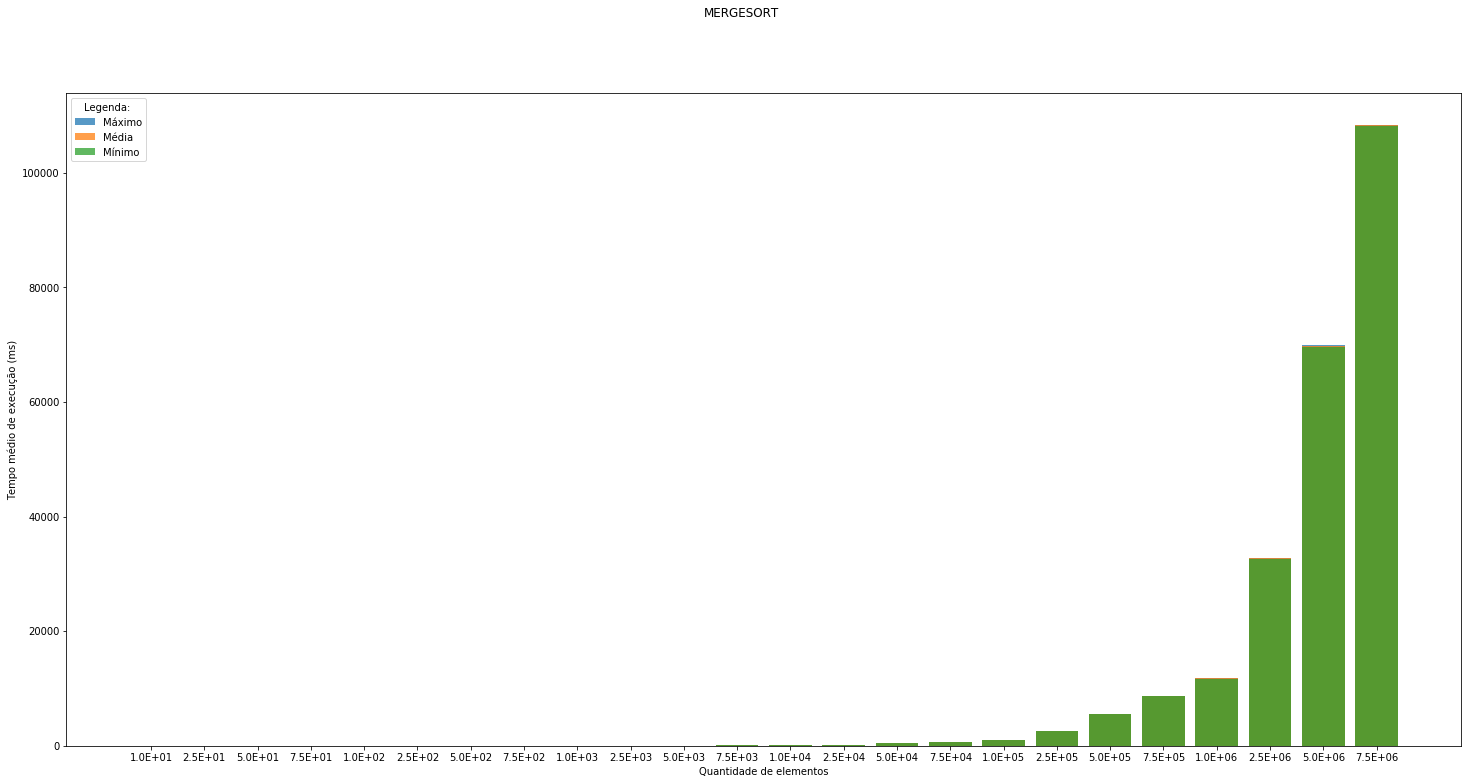

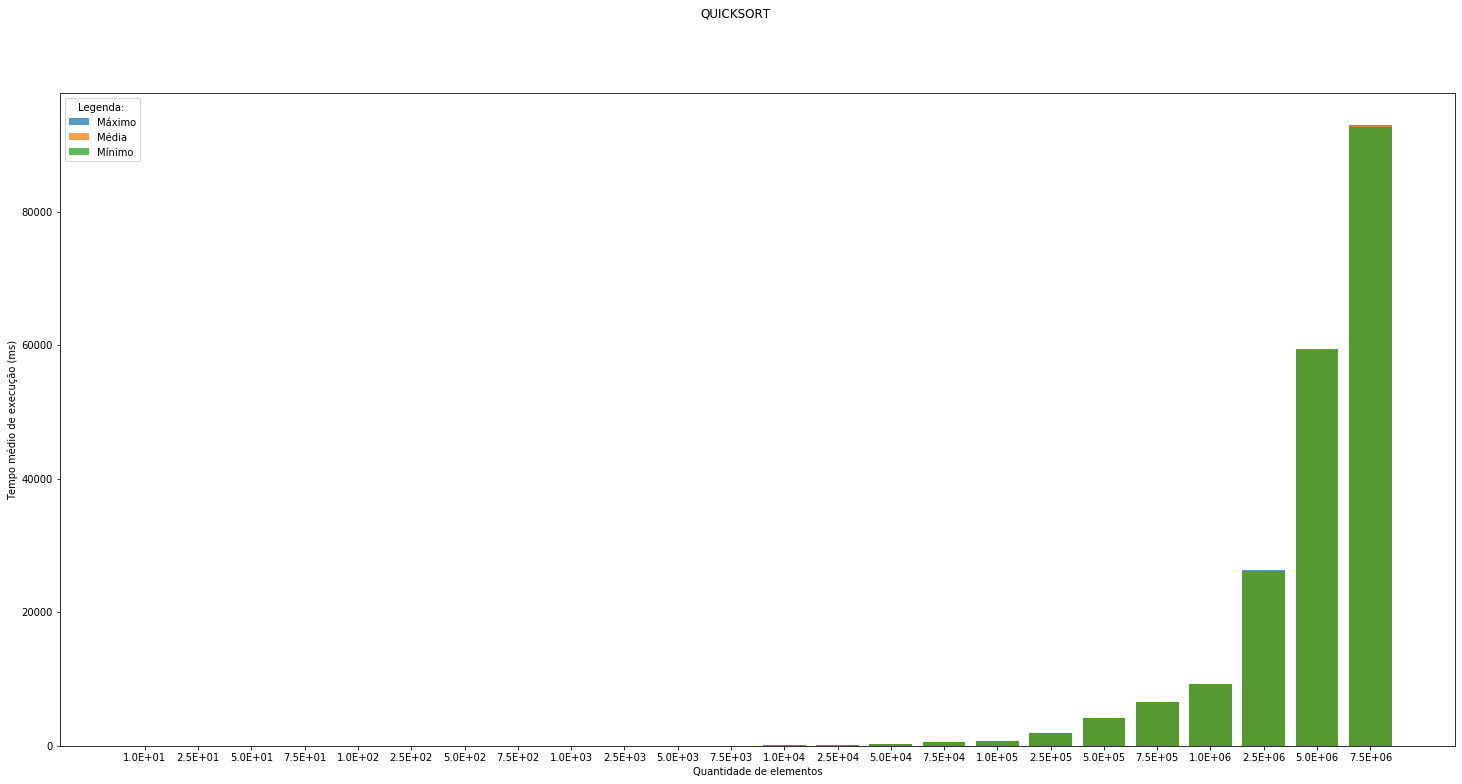

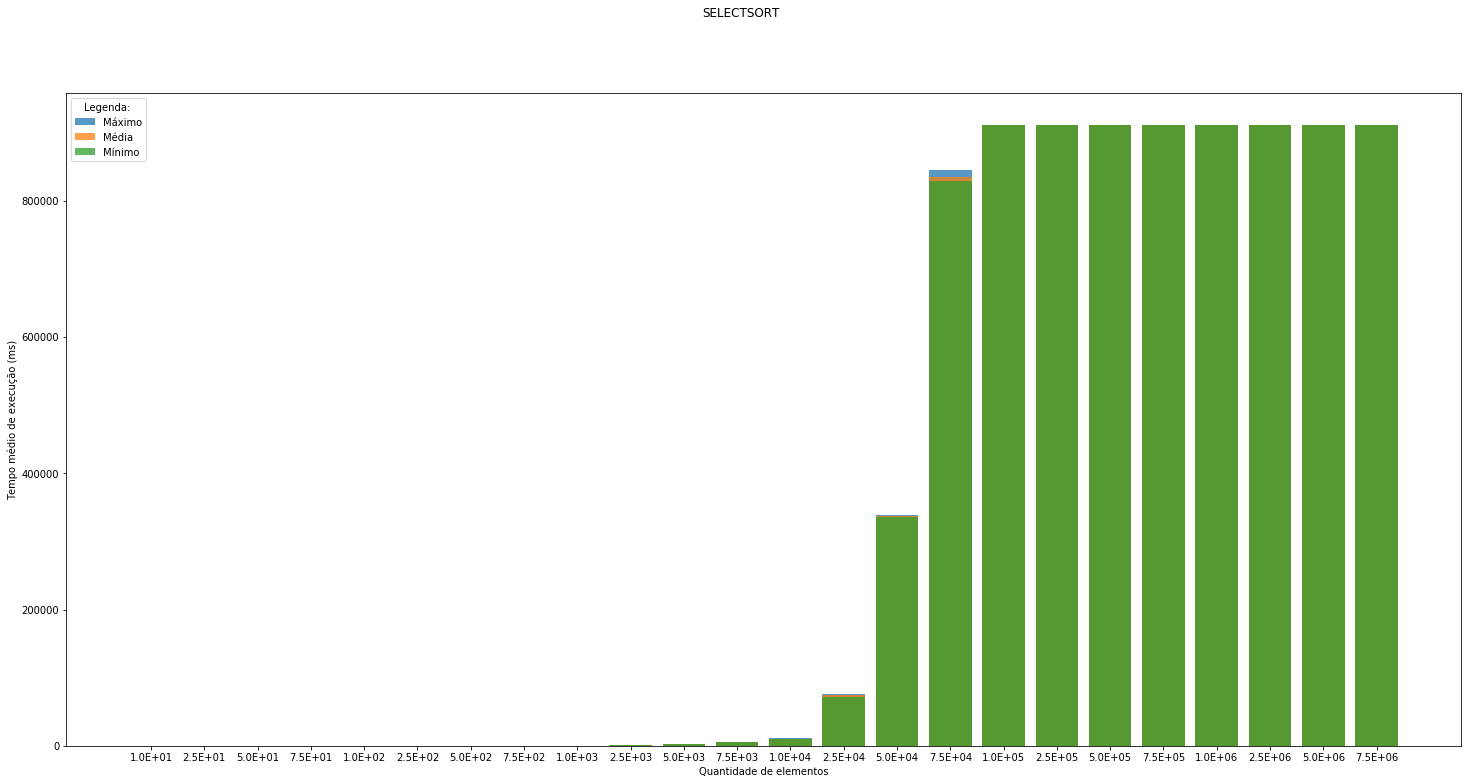

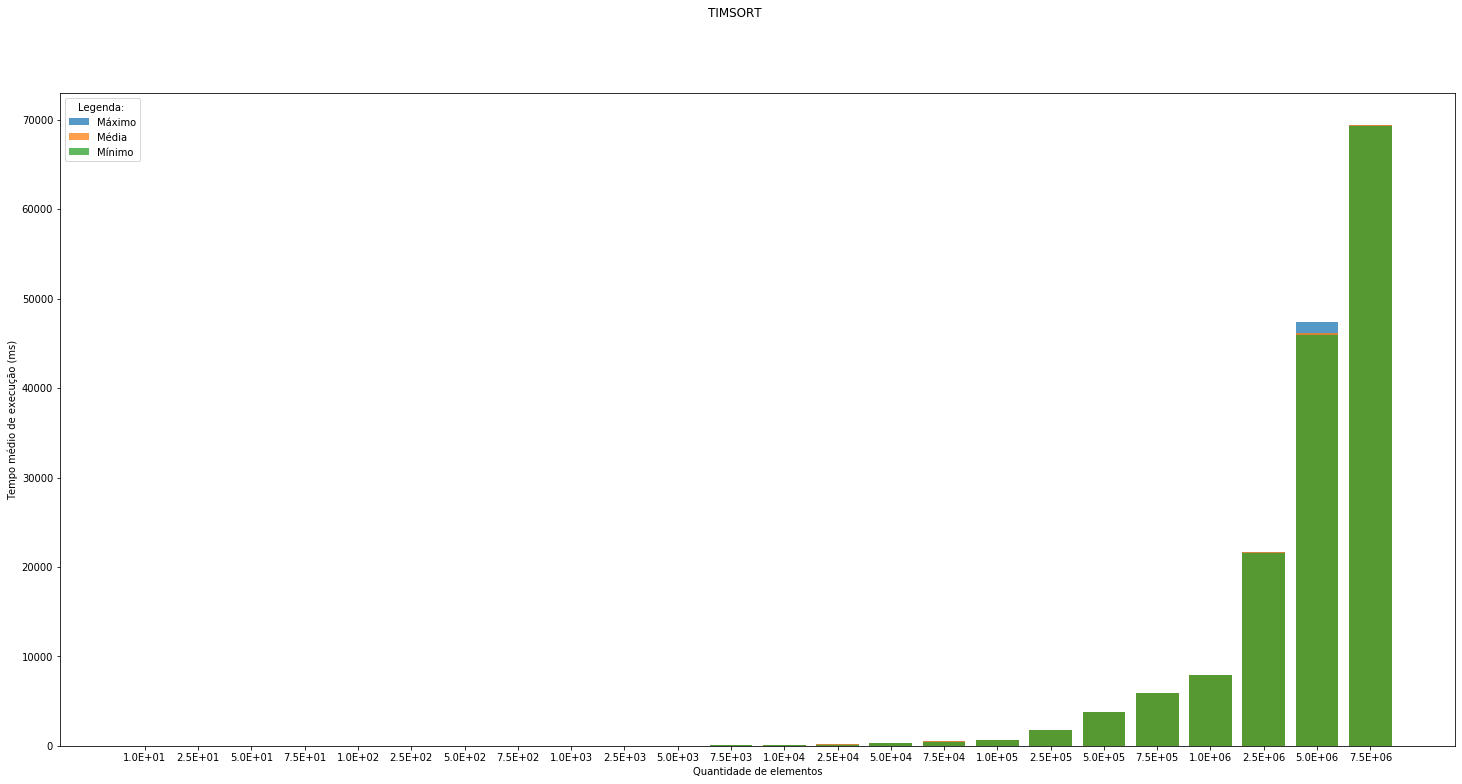

In [8]:
for algorithm in algorithms:
    heapsort = pd.read_csv("../files/analyze/average_times_numbers_records/" + algorithm + ".csv")
    # columns = np.array(list(map(toScientificNotation, heapsort.values[1:])))
    # list(heapsort.columns[1:])
    eixo_x = np.array(list(map(toScientificNotation,heapsort['Total Records'])))
    average_time = np.array(heapsort['Average Time Execution(ms)'])
    minimum_time = np.array(heapsort['Minimum Value(ms)'])
    maximum_time = np.array(heapsort['Maximum Value(ms)'])
    plt.figure(figsize=(25,12))
    plt.suptitle(algorithm.upper())
    plt.bar(eixo_x, maximum_time, label="Máximo", alpha=0.75)
    plt.bar(eixo_x, average_time, label="Média", alpha=0.75)
    plt.bar(eixo_x, minimum_time, label="Mínimo", alpha=0.75)
    plt.legend(title="Legenda: ")
    plt.ylabel("Tempo médio de execução (ms)")
    plt.xlabel("Quantidade de elementos")
    plt.savefig(algorithm + "_avg.svg", format="svg")
    plt.show()